In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
def sti(inf, sup):
    return np.append(-inf, sup)

def sti_inv(sti):  
    mid_idx = sti.shape[0] // 2
    return -sti[:mid_idx], sti[mid_idx:]

def sti_mul_mtx(matrix):
    pos = matrix.copy()
    neg = matrix.copy()
    pos[pos < 0] = 0
    neg[neg > 0] = 0
    neg = np.fabs(neg)
    return np.block([[pos, neg], [neg, pos]])



def generate_right_part(matrix):
    n = matrix.shape[0]
    x = np.random.uniform(low=1, high=5, size=n)
    b = np.dot(matrix, x)  
    rads = np.random.uniform(low=0.5, high=2, size=n) 
    b_inf = b - rads 
    b_sup = b + rads
    return b_inf, b_sup, x

def find_matrix(matrix, size):
    M = matrix
    indexes = []

    for i, col in enumerate(M.T):
        if np.fabs(col).sum() > 0:
            indexes.append(i)
    M = M.T[indexes].T

    size = min(M.shape[0], M.shape[1], size)
    
    while size > 0:
        s = 0
        for i in range(M.shape[0] - size + 1):
            s = 0
            for j in range(M.shape[1] - size + 1):
                s = 0
                if np.linalg.matrix_rank(M[i:i+size, j:j+size]) == size:
                    print(j)
                    break

                s+=1
                #for col in M[i:i+size, j:j+size].T:
                    #if (np.fabs(col).sum() < 0.2): #or (np.fabs(col.T).sum() < 0.1) :
                        #s+=1
                        #break


                #if s == 0:
                    #print(j)
                    #break

            if s == 0:
                print(i)
                break


        if s == 0:
            print(size)
            break

        size -=1
    
    return M[i:i+size, j:j+size]

In [6]:
A = np.array([[1 , 1],
             [0, 0.1]])

b_inf = np.array([4.1, 0.1])
b_sup = np.array([3.9, 0.3])

A_block = sti_mul_mtx(A)
result = np.dot(np.linalg.inv(A_block), sti(b_inf,b_sup))
result = sti_inv(result)
print(result)

(array([3.1, 1. ]), array([0.9, 3. ]))


22
0
14
[[ 5381.40902469 -5374.65242891]
 [ 8856.35567517 -8850.92491015]
 [-1017.05700077  1023.06863592]
 [-1012.00051143  1016.99974686]
 [ -824.44486115   833.02214805]
 [  827.64608379  -822.90007553]
 [  477.18247604  -471.57919952]
 [  -84.00613259    91.66044642]
 [-1938.24994477  1944.09615375]
 [-1937.98206641  1943.46693603]
 [-2245.02327348  2249.52818034]
 [-2779.36989247  2782.31420342]
 [-2240.96001365  2246.795978  ]
 [-4162.01538111  4170.78789066]]


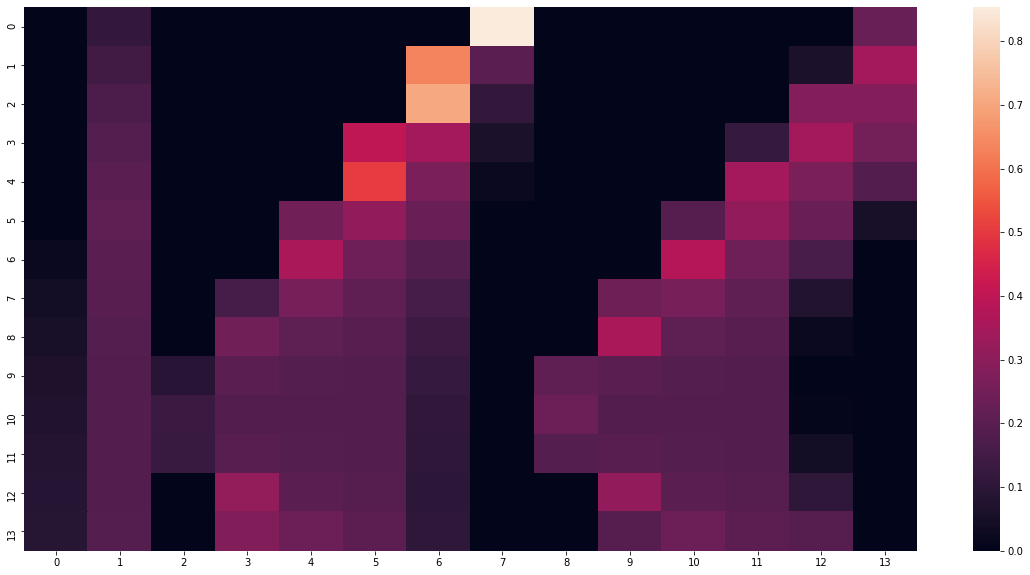

<Figure size 1440x720 with 0 Axes>

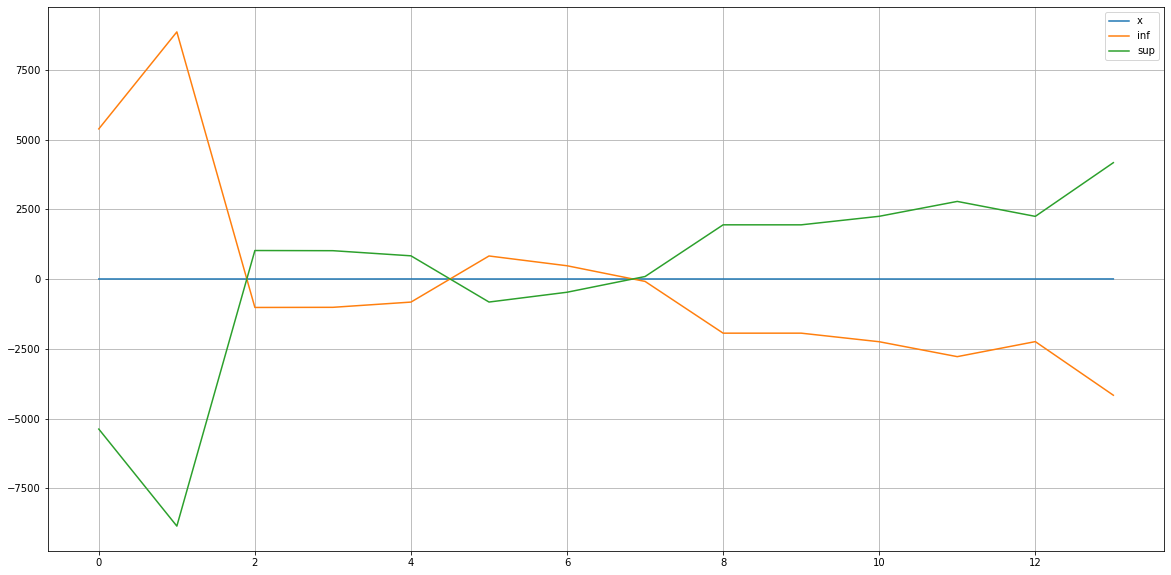

In [12]:
A2 = np.loadtxt('matrix_n_phi_1.txt')
A2 = find_matrix(A2,size = 14)
b_inf, b_sup, x = generate_right_part(A2)
sti_vec = sti(b_inf, b_sup)
A_block2 = sti_mul_mtx(A2)

res = np.dot(np.linalg.inv(A_block2), sti_vec)

res = sti_inv(res)
print(np.array(res).T)
plt.figure(figsize=(20,10))
sns.heatmap(A2)
plt.show()
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
plt.plot(x, label = "x")
plt.plot(res[0],label="inf")
plt.plot(res[1],label="sup")
plt.legend()
plt.grid()

103
84
19
[[ 7.23935981e+01 -6.26421752e+01]
 [ 8.70852901e+01 -8.50438333e+01]
 [ 2.35210192e+02 -2.32546304e+02]
 [ 1.32300906e+01 -5.33082646e+00]
 [ 1.51434484e+02 -1.41899808e+02]
 [ 6.16151176e+02 -6.11966662e+02]
 [ 5.75931752e+02 -5.70448063e+02]
 [ 2.99985272e+02 -2.96018332e+02]
 [-1.32784268e+02  1.37647626e+02]
 [-1.69006552e+02  1.73003052e+02]
 [-7.69414256e+01  8.00396249e+01]
 [ 6.58716306e+01 -6.11664464e+01]
 [ 4.40183680e+00  2.53406878e-01]
 [-1.60904662e+00  7.12561625e+00]
 [-6.46424333e+02  6.50982710e+02]
 [-7.51154307e+01  8.18778939e+01]
 [-1.35571465e+01  1.78431719e+01]
 [ 8.40722575e+00 -3.86296654e+00]
 [-3.97278521e-01  5.59513665e+00]]


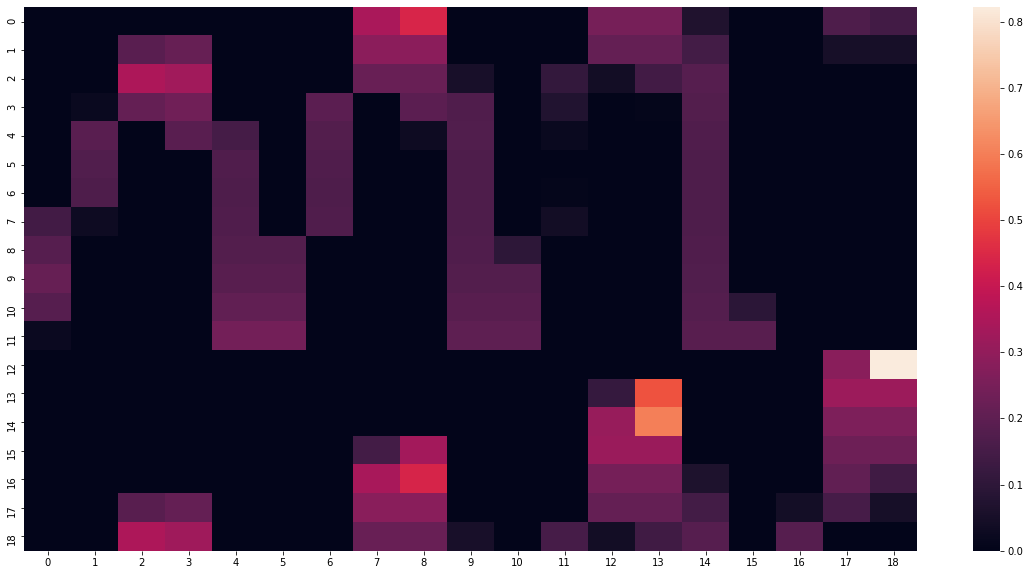

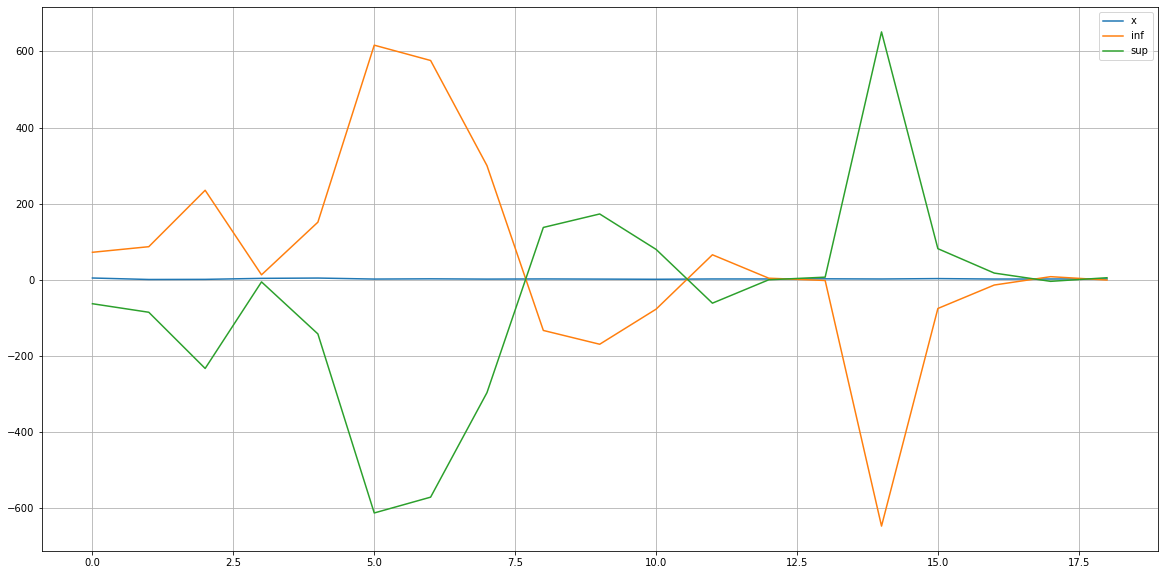

In [11]:
A3 = np.loadtxt('matrix_n_phi_6.txt')
A3 =  find_matrix(A3,size = 19)
b_inf3, b_sup3, x3 = generate_right_part(A3)
sti_vec3 = sti(b_inf3, b_sup3)
A_block3 = sti_mul_mtx(A3)

res3 = np.dot(np.linalg.inv(A_block3), sti_vec3)

res3 = sti_inv(res3)
print(np.array(res3).T)
plt.figure(figsize=(20,10))
sns.heatmap(A3)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(x3, label = "x")
plt.plot(res3[0],label="inf")
plt.plot(res3[1],label="sup")
plt.legend()
plt.grid()

(array([3.68466703, 4.33831656, 3.21541464, 1.45350653, 3.34658922,
        4.20976585, 3.37523424, 1.72411108, 2.86082445, 2.78074815,
        3.53450641, 2.75536087, 2.4180915 , 3.96663797, 4.1239072 ,
        3.43107027, 0.8177097 , 3.24212353, 1.68296323, 0.80174404,
        0.88119413, 1.90578161, 3.66677145, 4.02291868, 2.77793373,
        4.22476781, 2.24294513, 1.82570333, 1.59821454, 0.9763834 ,
        3.69459854, 4.38432968, 3.44730943, 3.67389039, 0.97048829,
        2.170861  ]),
 array([4.73718001, 5.45030966, 3.35361158, 1.6164818 , 4.36080219,
        5.61748859, 4.15722209, 2.25282196, 3.18551467, 3.87129212,
        3.58417579, 2.64041201, 2.3929925 , 4.83892583, 4.10491953,
        3.61673621, 1.38126851, 4.32373763, 1.93754208, 2.41975958,
        2.27555599, 2.16909533, 3.81321135, 4.81043314, 3.33936399,
        4.8851394 , 2.79884903, 2.38494954, 1.68244401, 1.67999649,
        4.88585878, 4.42539011, 5.45916863, 3.99392486, 1.34600816,
        4.08386542]))